In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [290]:
df = pd.read_csv('th1.csv')

# Hiển thị thông tin chung về DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 49 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     365 non-null    object 
 1   1       365 non-null    float64
 2   2       365 non-null    float64
 3   3       365 non-null    float64
 4   4       365 non-null    float64
 5   5       365 non-null    float64
 6   6       365 non-null    float64
 7   7       365 non-null    float64
 8   8       365 non-null    float64
 9   9       365 non-null    float64
 10  10      365 non-null    float64
 11  11      365 non-null    float64
 12  12      365 non-null    float64
 13  13      365 non-null    float64
 14  14      365 non-null    float64
 15  15      365 non-null    float64
 16  16      365 non-null    float64
 17  17      365 non-null    float64
 18  18      365 non-null    float64
 19  19      365 non-null    float64
 20  20      365 non-null    float64
 21  21      365 non-null    float64
 22  22

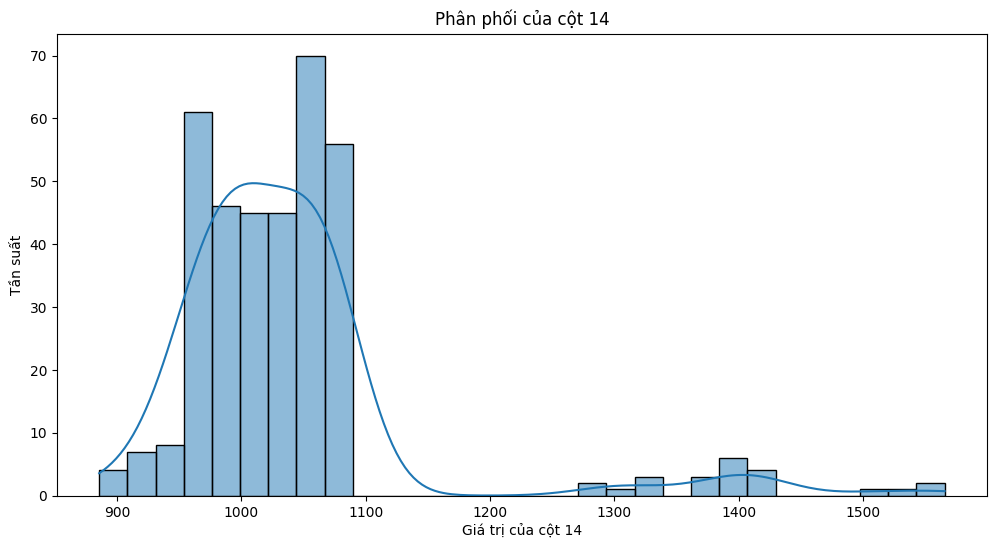

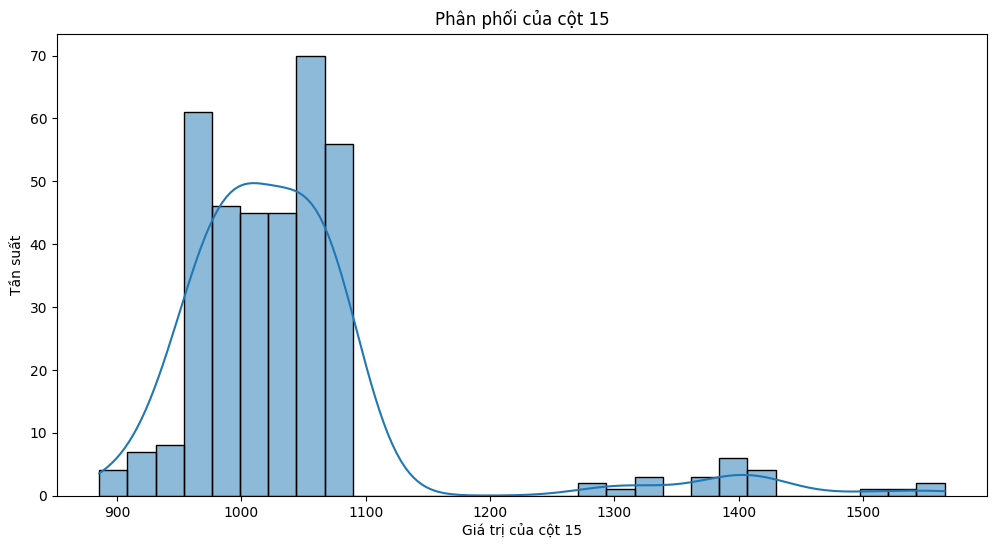

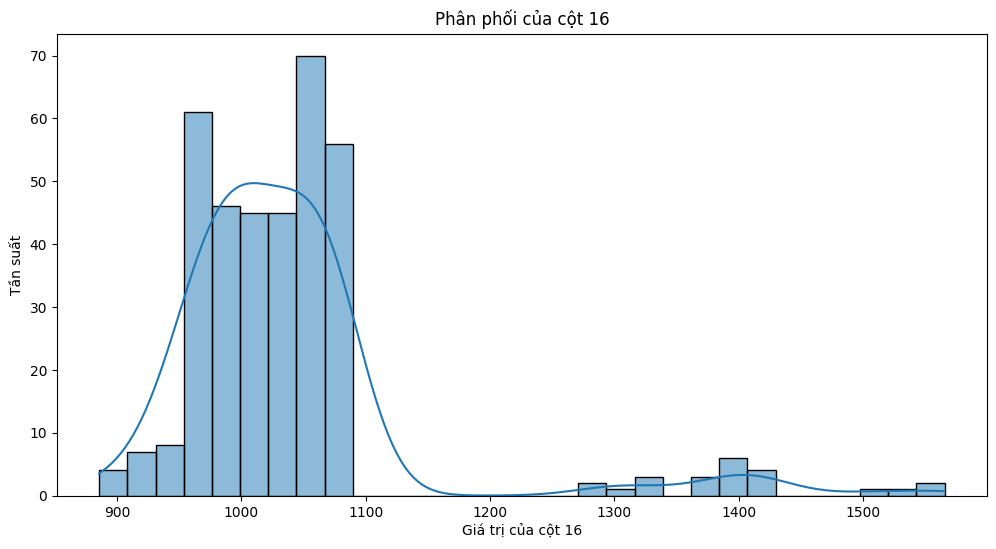

In [291]:
# Biểu đồ phân phối cho cột '14'
plt.figure(figsize=(12, 6))
sns.histplot(df['14'], bins=30, kde=True)
plt.title('Phân phối của cột 14')
plt.xlabel('Giá trị của cột 14')
plt.ylabel('Tần suất')
plt.show()

# Biểu đồ phân phối cho cột '15'
plt.figure(figsize=(12, 6))
sns.histplot(df['15'], bins=30, kde=True)
plt.title('Phân phối của cột 15')
plt.xlabel('Giá trị của cột 15')
plt.ylabel('Tần suất')
plt.show()

# Biểu đồ phân phối cho cột '16'
plt.figure(figsize=(12, 6))
sns.histplot(df['15'], bins=30, kde=True)
plt.title('Phân phối của cột 16')
plt.xlabel('Giá trị của cột 16')
plt.ylabel('Tần suất')
plt.show()

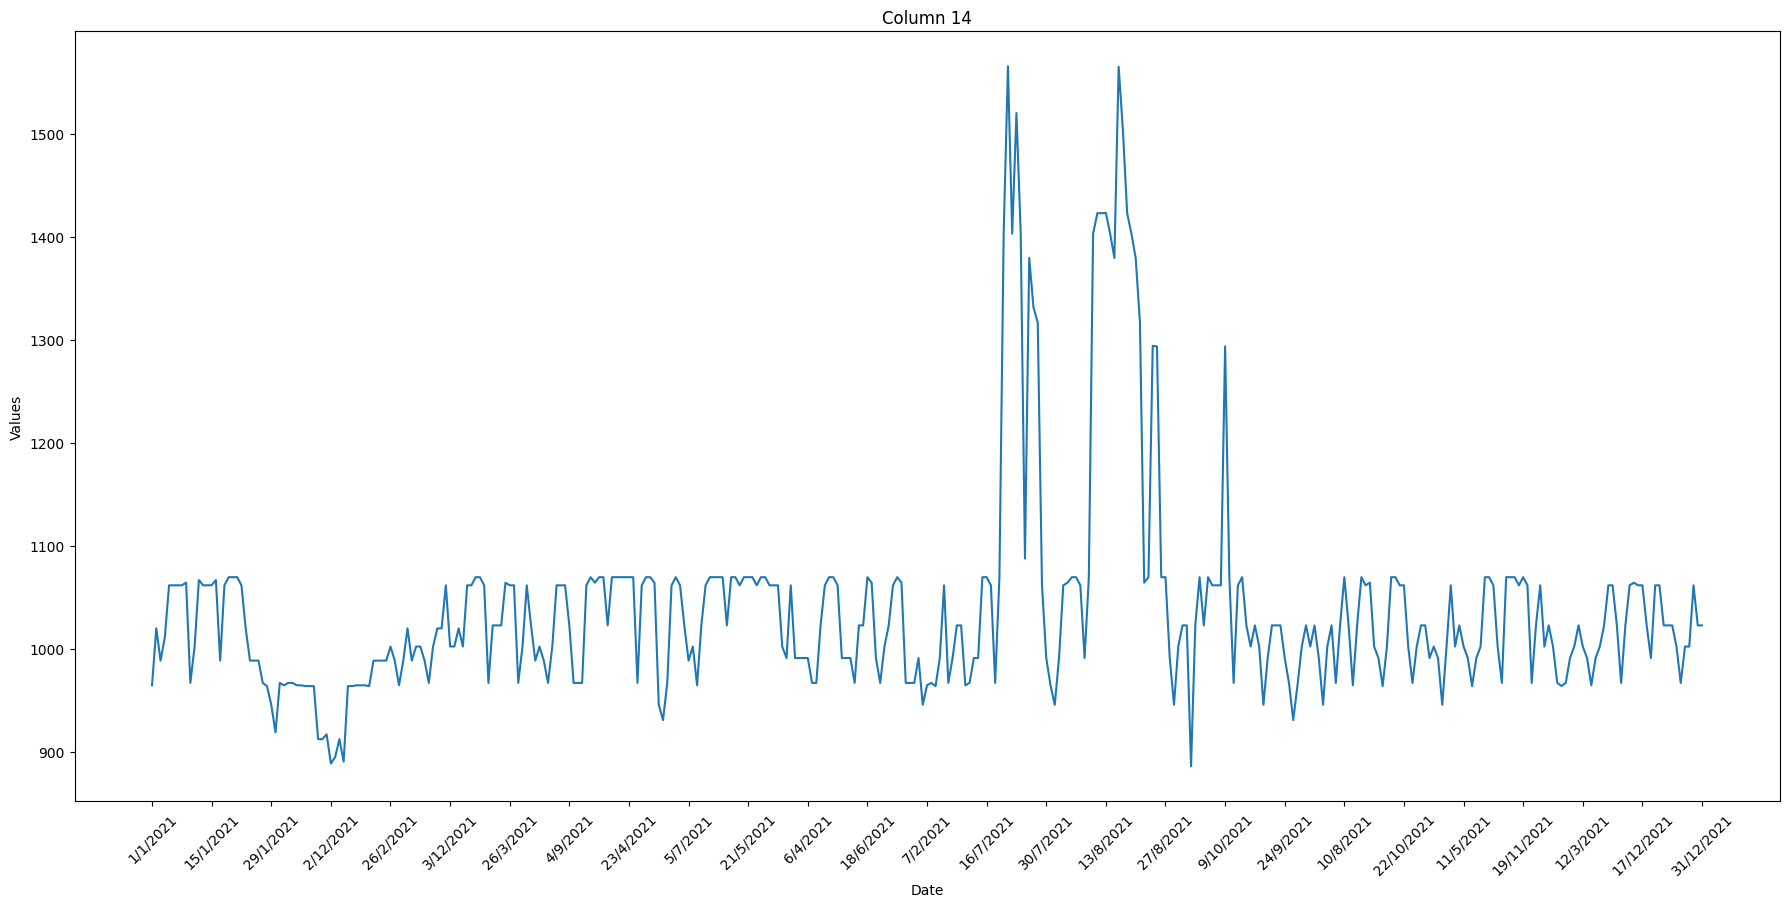

In [292]:
# biểu đồ biểu diễn giá trị của cột 14 theo thời gian
df_14 = df['14']
df14_bin = df['14']
plt.figure(figsize=(22,10))
plt.plot(df['Day'],df['14'])
plt.title("Column 14")
plt.xlabel("Date")
plt.ylabel("Values")
plt.xticks(df['Day'][::14], df['Day'][::14], rotation=45)
plt.show()

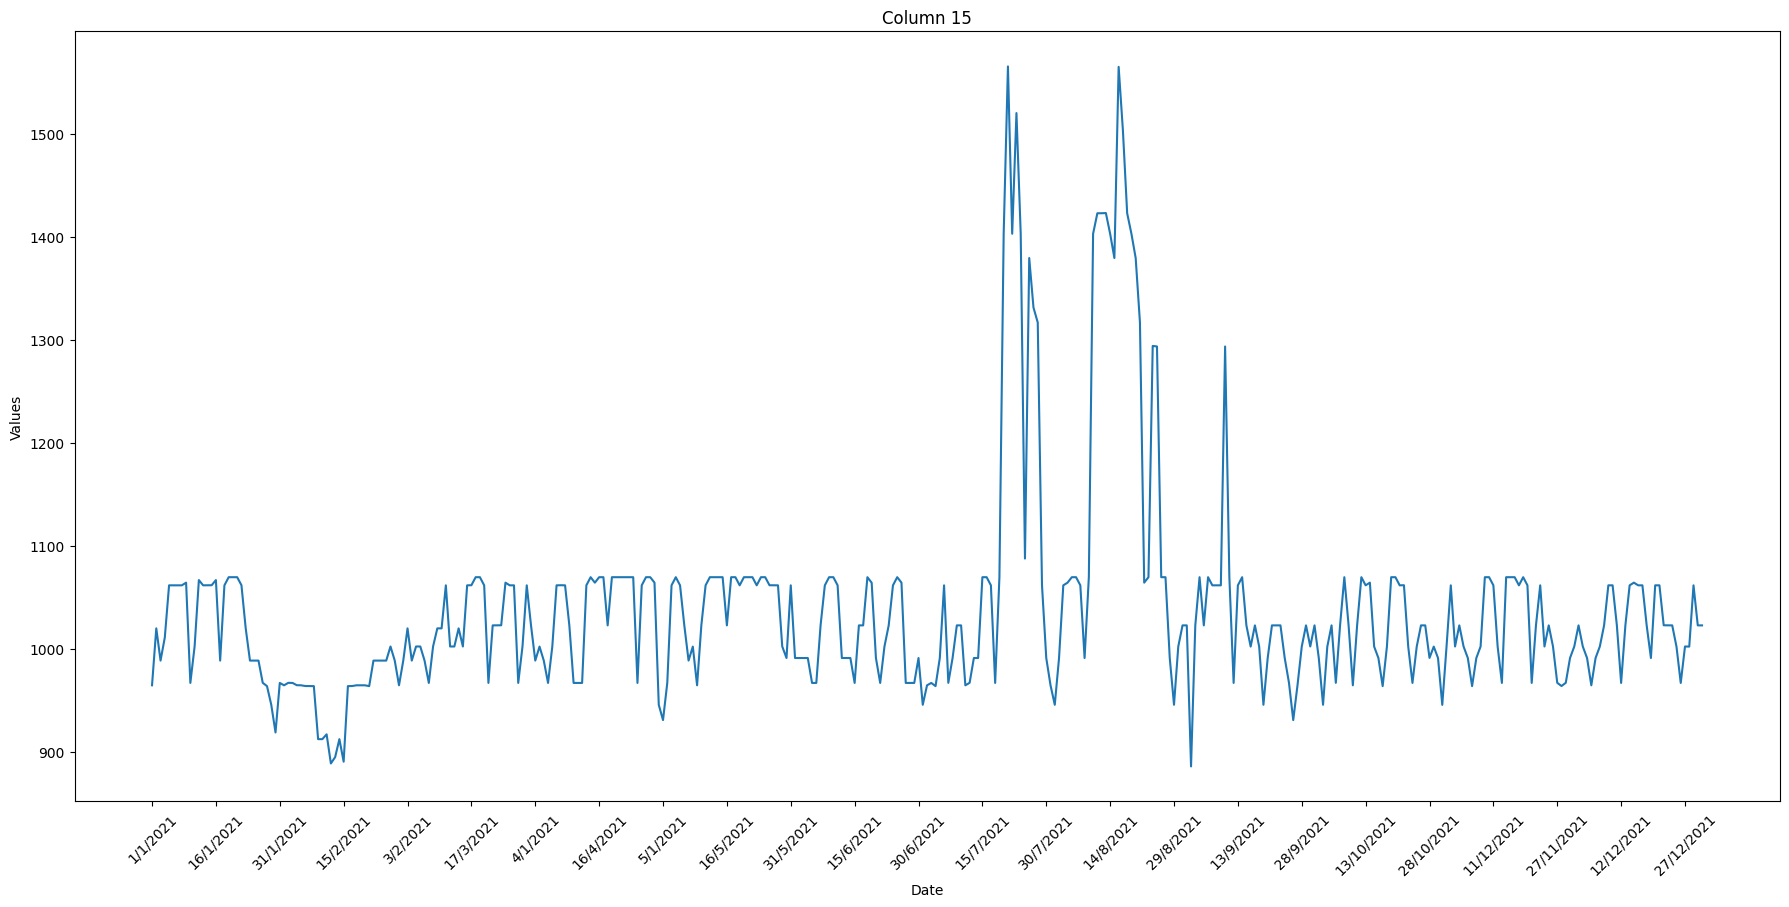

In [293]:
# biểu đồ biểu diễn giá trị của cột 15 theo thời gian
df_15 = df['15']
df15_bin = df['15']
plt.figure(figsize=(22,10))
plt.plot(df['Day'],df['15'])
plt.title("Column 15")
plt.xlabel("Date")
plt.ylabel("Values")
plt.xticks(df['Day'][::15], df['Day'][::15], rotation=45)
plt.show()

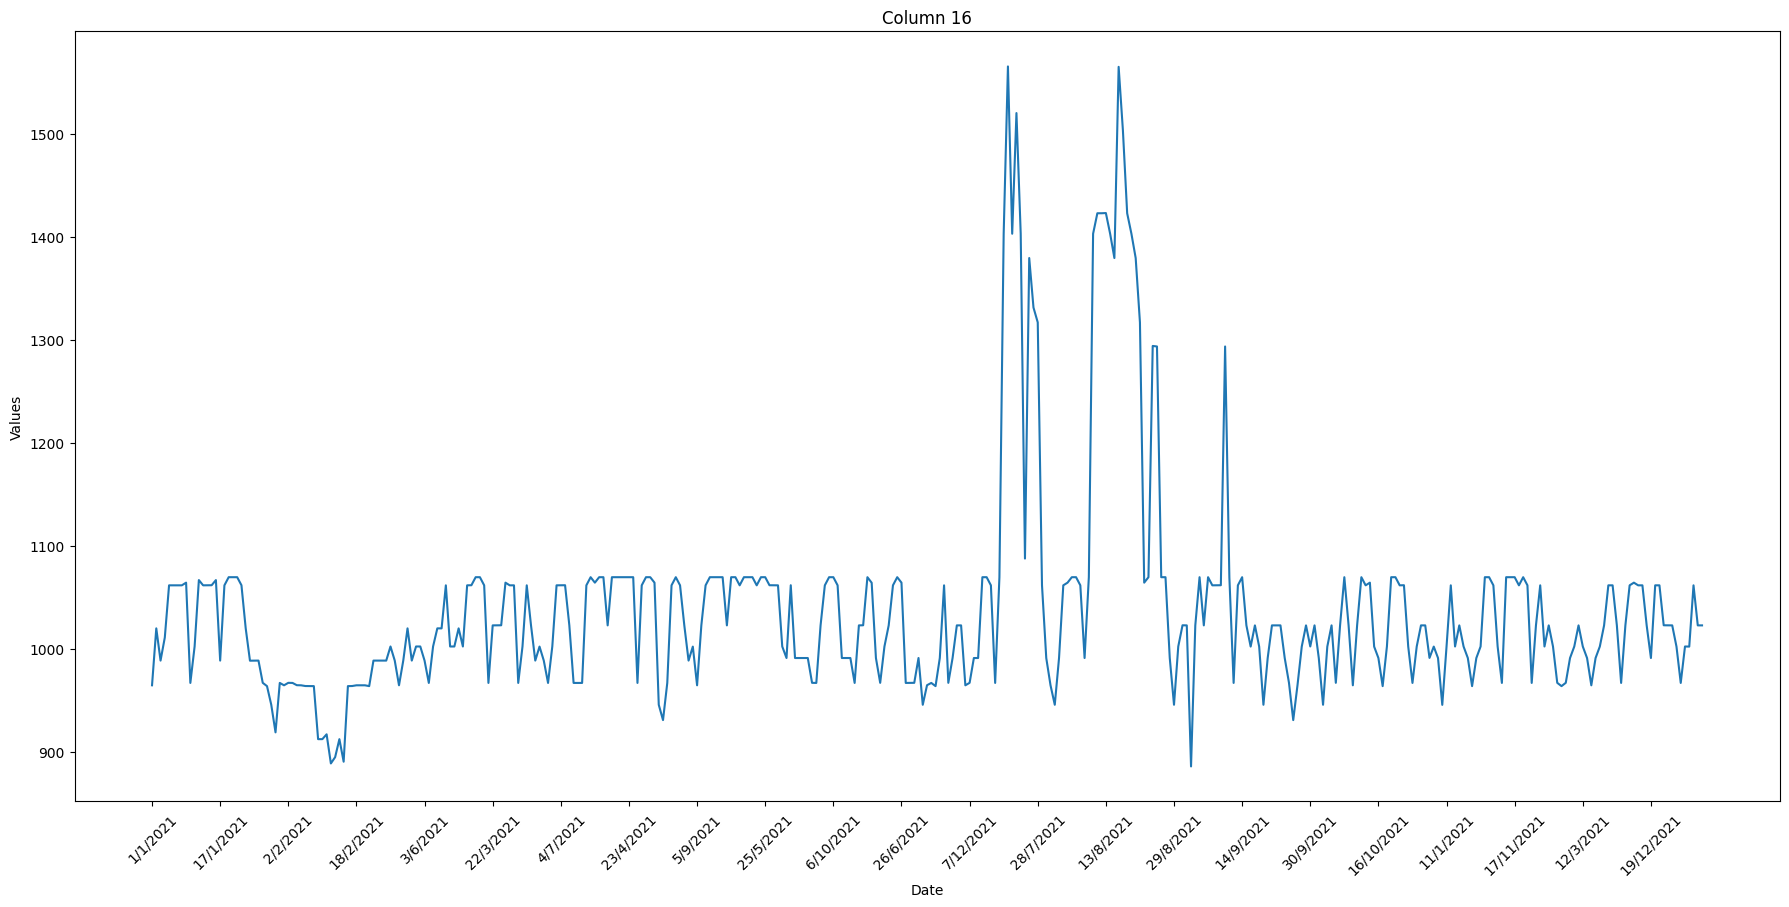

In [294]:
# biểu đồ biểu diễn giá trị của cột 16 theo thời gian
df_16 = df['16']
df16_bin = df['16']
plt.figure(figsize=(22,10))
plt.plot(df['Day'],df['16'])
plt.title("Column 16")
plt.xlabel("Date")
plt.ylabel("Values")
plt.xticks(df['Day'][::16], df['Day'][::16], rotation=45)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22280\2175332492.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(df['14'], df['15'], df['16'], s=40, marker='.', cmap = 'rainbow' )


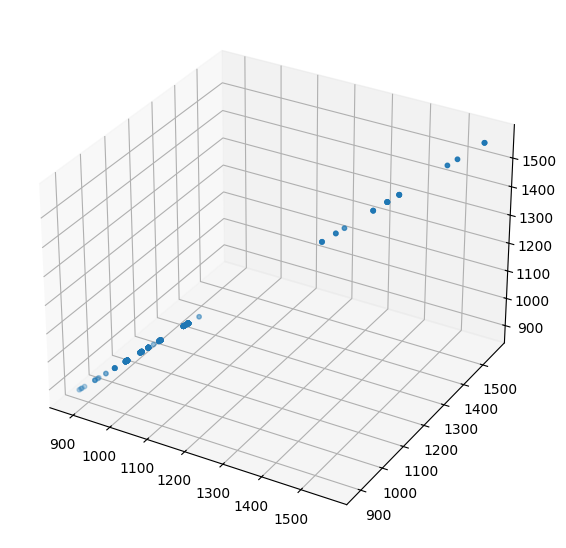

In [295]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1, projection='3d', label="bla")
ax.scatter(df['14'], df['15'], df['16'], s=40, marker='.', cmap = 'rainbow' )

<h1>Kalman</h1>

In [296]:
import numpy as np

df = df[['14', '15', '16']]
dt = np.loadtxt('th1.csv', encoding='latin-1', delimiter=',', skiprows=1, usecols=(14, 15, 16), dtype=float)

In [297]:
# Khởi tạo biến trạng thái (state vector)
x = np.zeros((3, 1))  # 3 biến trạng thái tương ứng với 3 cột

# Ma trận hiệp phương sai của trạng thái (covariance matrix)
P = np.eye(3)

# Ma trận chuyển tiếp trạng thái (state transition matrix)
F = np.eye(3)

# Ma trận đo lường (measurement matrix)
H = np.eye(3)

# Hiệp phương sai của nhiễu quá trình (process noise covariance)
Q = np.eye(3) * 0.01

# Hiệp phương sai của nhiễu đo lường (measurement noise covariance)
R = np.eye(3) * 0.1

# Vector đo lường (measurement vector)
z = np.zeros((3, 1))

In [298]:
print(df.describe())

                14           15           16
count   365.000000   365.000000   365.000000
mean   1040.314521  1040.321918  1040.326301
std     105.145787   105.144258   105.143470
min     885.700000   885.600000   885.600000
25%     988.400000   988.400000   988.400000
50%    1022.600000  1022.600000  1022.600000
75%    1061.600000  1061.600000  1061.600000
max    1565.500000  1565.500000  1565.500000


In [299]:
def predict(x, P, F, Q):
    # Dự đoán trạng thái tiếp theo
    x = np.dot(F, x)
    P = np.dot(F, np.dot(P, F.T)) + Q
    return x, P

def update(x, P, z, H, R):
    # Tính toán các giá trị Kalman Gain
    y = z - np.dot(H, x)
    S = np.dot(H, np.dot(P, H.T)) + R
    K = np.dot(P, np.dot(H.T, np.linalg.inv(S)))

    # Cập nhật trạng thái và hiệp phương sai
    x = x + np.dot(K, y)
    P = P - np.dot(K, np.dot(H, P))
    return x, P

In [300]:
filtered_data2 = []

for measurement in dt:
    z = measurement.reshape(3, 1)  # Chuyển đổi đo lường thành vector cột

    # Dự đoán bước tiếp theo
    x, P = predict(x, P, F, Q)

    # Cập nhật với đo lường mới
    x, P = update(x, P, z, H, R)

    # Lưu trữ kết quả đã lọc
    filtered_data2.append(x.flatten())

filtered_data2 = np.array(filtered_data2)

In [301]:
df['kalman'] = filtered_data2[:, 0]

In [302]:
mse_kalman = mean_squared_error(dt, filtered_data2)
mae_kalman = mean_absolute_error(dt, filtered_data2)
rmse_kalman = np.sqrt(mse_kalman)

print("Kalman Filter - MSE:", mse_kalman)
print("Kalman Filter - MAE:", mae_kalman)
print("Kalman Filter - RMSE:", rmse_kalman)

Kalman Filter - MSE: 2795.543314793346
Kalman Filter - MAE: 32.44236277623181
Kalman Filter - RMSE: 52.87289773403143


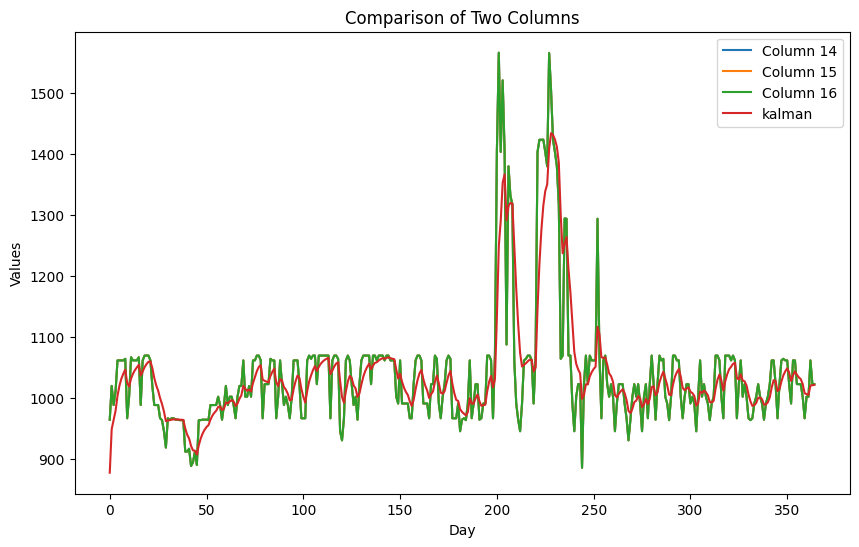

In [303]:
# Vẽ biểu đồ so sánh hai cột
plt.figure(figsize=(10, 6))
plt.plot(df['14'], label='Column 14')
plt.plot(df['15'], label='Column 15')
plt.plot(df['16'], label='Column 16')
plt.plot(df['kalman'], label='kalman')
plt.xlabel('Day')
plt.ylabel('Values')
plt.title('Comparison of Two Columns')
plt.legend()
plt.show()

<h1>SARIMA</h1>

In [304]:
df = pd.read_csv('th1.csv')

In [305]:
series = df.iloc[:, 14]

# Điền giá trị thiếu bằng phương pháp nội suy (interpolation)
series = series.interpolate(method='linear')

# Định nghĩa các tham số của mô hình SARIMA
order = (1, 1, 1)         # Tham số (p, d, q) cho phần không mùa
seasonal_order = (1, 1, 1, 12)  # Tham số (P, D, Q, s) cho phần mùa (s = 12 cho dữ liệu theo tháng)

# Xây dựng và huấn luyện mô hình SARIMA
model = SARIMAX(series, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# In kết quả huấn luyện
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                 14   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1966.358
Date:                            Tue, 21 May 2024   AIC                           3942.716
Time:                                    11:50:25   BIC                           3962.035
Sample:                                         0   HQIC                          3950.404
                                            - 365                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9986     35.701      0.028      0.978     -68.974      70.971
ma.L1         -0.9993     71.658   

SARIMA - MSE: 7108.286061038034
SARIMA - MAE: 43.31316097086826
SARIMA - RMSE: 84.31065212082062


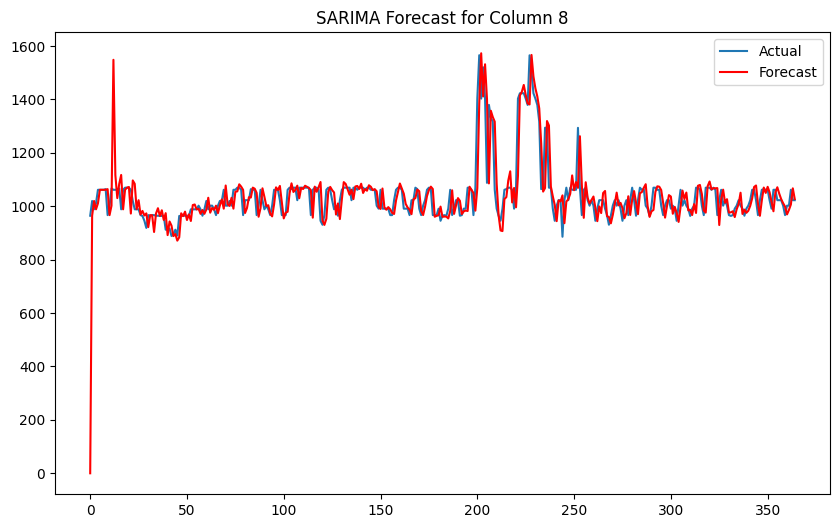

In [306]:
# Dự đoán giá trị
n_forecast = len(series)
forecast = model_fit.predict(start=0, end=n_forecast-1)

# Tính toán độ đo lỗi
mse = mean_squared_error(series, forecast)
mae = mean_absolute_error(series, forecast)
rmse = np.sqrt(mse)

print("SARIMA - MSE:", mse)
print("SARIMA - MAE:", mae)
print("SARIMA - RMSE:", rmse)

# Vẽ biểu đồ kết quả dự đoán
plt.figure(figsize=(10, 6))
plt.plot(series, label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.title('SARIMA Forecast for Column 8')
plt.legend()
plt.show()